In [1]:
# Import essential libraby for plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotly import tools
import plotly.plotly as py
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from IPython.display import HTML, Image

%matplotlib inline


In [2]:
# Import data
df = pd.read_excel('Pokemon.xlsx') #, index_col=0)

In [3]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [4]:
# Re-indexing
df = pd.read_excel('Pokemon.xlsx', index_col=0)

In [5]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


Data visualization by seaborn

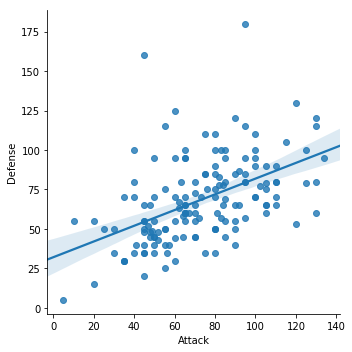

In [6]:
sns.lmplot(x='Attack', y='Defense', data=df)

/Users/KetaloChiang/Documents/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/Users/KetaloChiang/Documents/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



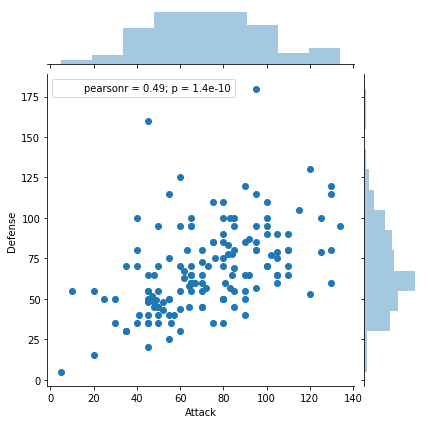

In [8]:
sns.jointplot(x="Attack", y ="Defense", data=df)

/Users/KetaloChiang/Documents/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/Users/KetaloChiang/Documents/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



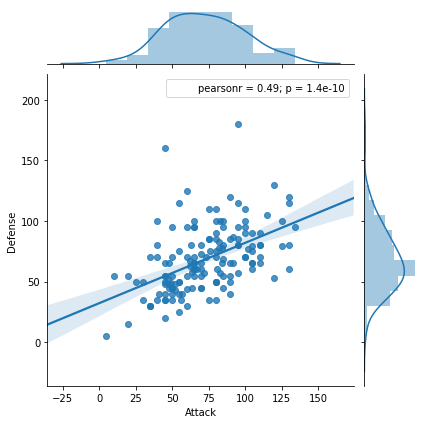

In [9]:
sns.jointplot(x="Attack", y ="Defense", data=df, kind="reg")

/Users/KetaloChiang/Documents/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/Users/KetaloChiang/Documents/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



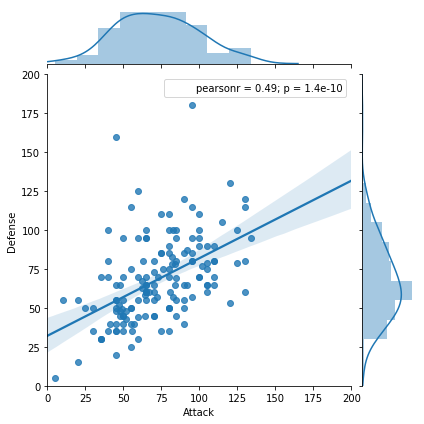

In [10]:
sns.jointplot(x="Attack", y ="Defense", data=df, kind="reg", 
              xlim=(0, 200), ylim=(0, 200))

/Users/KetaloChiang/Documents/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/Users/KetaloChiang/Documents/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



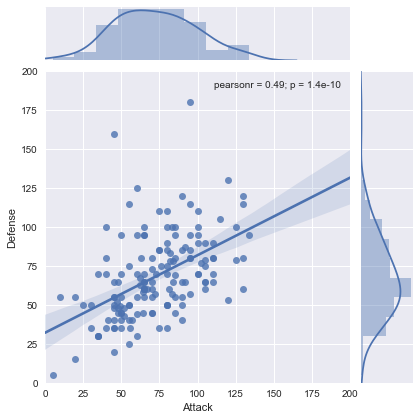

In [11]:
sns.set()
sns.jointplot(x="Attack", y ="Defense", data=df, kind="reg", 
              xlim=(0, 200), ylim=(0, 200))

Data visualization by using Plotly

In [12]:
trace0 = go.Box(y=df["HP"],name="HP")
trace1 = go.Box(y=df["Attack"],name="Attack")
trace2 = go.Box(y=df["Defense"],name="Defense")
trace3 = go.Box(y=df["Sp. Atk"],name="Sp. Atk")
trace4 = go.Box(y=df["Sp. Def"],name="Sp. Def")
trace5 = go.Box(y=df["Speed"],name="Speed")
data = [trace0, trace1, trace2,trace3, trace4, trace5]
iplot(data)

Customized Boxplots

In [13]:
trace0 = go.Box(
    y=df["HP"],
    boxmean = True,
    name="HP(with Mean)"
)
trace1 = go.Box(
    y=df["Attack"],
    boxmean = 'sd',
    name="Attack(Mean and SD)"
)
trace2 = go.Box(
    y=df["Defense"],
    jitter = 0.5,
    pointpos = -2,
    boxpoints = 'all',
    name = "Defense(All points)"
)
trace3 = go.Box(
    y=df["Sp. Atk"],
    boxpoints = False,
    name = "Sp. Atk(Only Whiskers)"
)
trace4 = go.Box(
    y=df["Sp. Def"],
    boxpoints = 'suspectedoutliers',
    marker = dict(
        outliercolor = 'rgba(219, 64, 82, 0.6)',
        line = dict(
            outliercolor = 'rgba(219, 64, 82, 0.6)',
            outlierwidth = 2)),
    line = dict(
        color = 'rgb(8,81,156)'),
    name = "Sp. Def(Suspected Outliers)"
)
trace5 = go.Box(
    y=df["Speed"],
    boxpoints = 'outliers',
    line = dict(
        color = 'rgb(107,174,214)'),
    name = "Speed(Whiskers and Outliers)"
)

layout = go.Layout(
    title = "Boxplot with customized outliers"
)
data = [trace0, trace1, trace2, trace3, trace4, trace5]
fig = go.Figure(data=data,layout=layout)
iplot(fig, filename = "Customized Boxplot")

In [14]:
x = df[df["Name"] == "Pikachu"]
data = [go.Scatterpolar(
  r = [x['HP'].values[0],x['Attack'].values[0],x['Defense'].values[0],x['Sp. Atk'].values[0],x['Sp. Def'].values[0],x['Speed'].values[0],x["HP"].values[0]],
  theta = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','HP'],
  fill = 'toself'
)]

layout = go.Layout(
  polar = dict(
    radialaxis = dict(
      visible = True,
      range = [0, 250]
    )
  ),
  showlegend = False,
  title = "Stats of {}".format(x.Name.values[0])
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename = "Single Pokemon stats")

Comparing the stats of 2 pokemon

In [15]:
# Creating a method to compare 2 pokemon
def compare2pokemon(x,y):
    x = df[df["Name"] == x]
    y = df[df["Name"] == y]

    trace0 = go.Scatterpolar(
      r = [x['HP'].values[0],x['Attack'].values[0],x['Defense'].values[0],x['Sp. Atk'].values[0],
           x['Sp. Def'].values[0],x['Speed'].values[0],x["HP"].values[0]],
      theta = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','HP'],
      fill = 'toself',
      name = x.Name.values[0]
    )

    trace1 = go.Scatterpolar(
      r = [y['HP'].values[0],y['Attack'].values[0],y['Defense'].values[0],y['Sp. Atk'].values[0],
           y['Sp. Def'].values[0],y['Speed'].values[0],y["HP"].values[0]],
      theta = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','HP'],
      fill = 'toself',
      name = y.Name.values[0]
    )

    data = [trace0, trace1]

    layout = go.Layout(
      polar = dict(
        radialaxis = dict(
          visible = True,
          range = [0, 200]
        )
      ),
      showlegend = True,
      title = "{} vs {}".format(x.Name.values[0],y.Name.values[0])
    )
    fig = go.Figure(data=data, layout=layout)
    iplot(fig, filename = "Two Pokemon stats")

In [16]:
compare2pokemon("Pikachu", "Raichu")

In [18]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


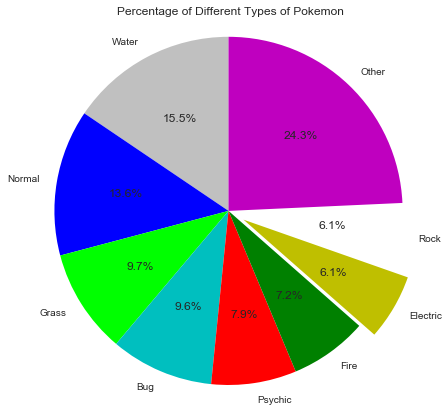

In [17]:
labels = 'Water', 'Normal', 'Grass', 'Bug', 'Psychic', 'Fire', 'Electric', 'Rock', 'Other'
sizes = [112, 98, 70, 69, 57, 52, 44, 44, 175]
colors = ['silver', 'B', '#00ff00', 'C', 'R', 'G', 'Y', 'white', 'M']
explode = (0, 0, 0, 0, 0, 0, 0.1, 0, 0)  # only "explode" the 3rd slice 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=False, startangle=90)
plt.axis('equal')
plt.title("Percentage of Different Types of Pokemon")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.show()